## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
from scipy.stats.mstats import mquantiles
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [6]:
# graph setting
sns.set()

## 国勢調査回答率

In [7]:
os.makedirs("data",exist_ok=True)
urlretrieve("https://git.io/vXtMv","data/census.csv")

('data/census.csv', <http.client.HTTPMessage at 0x7f0f11bc4190>)

In [8]:
df=pd.read_csv("./data/census.csv")

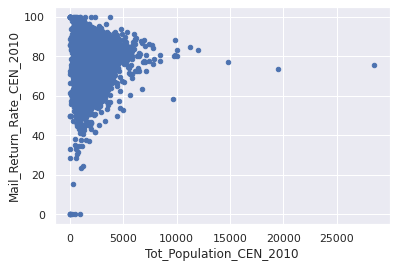

In [9]:
df.plot.scatter(y="Mail_Return_Rate_CEN_2010",x="Tot_Population_CEN_2010");

## 人気順ソート

In [10]:
votes=np.array([
    [2,0],
    [7,0],
    [120,18],
])

In [11]:
def posterior_upvote_ratio(upvotes,downvotes,samples=20000):
    N=upvotes+downvotes
    with pm.Model() as model:
        upvote_ratio=pm.Uniform("upvote_ratio",0,1)
        observations=pm.Binomial("obs",N,upvote_ratio,observed=upvotes)
        trace=pm.sample(samples,step=pm.Metropolis())
        
    burned_trace = trace[int(samples/4):]
    return burned_trace["upvote_ratio"],model

In [12]:
posteriors=[]
for upvote,downvote in votes:
    posterior,model=posterior_upvote_ratio(upvote,downvote)
    posteriors.append(posterior)

/workspaces/load_to_goal/GitHub/bayesian_statistics/.venv/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]
INFO:pymc3:Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 17 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 17 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/workspaces/load_to_goal/GitHub/bayesian_statistics/.venv/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]
INFO:pymc3:Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 15 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/workspaces/load_to_goal/GitHub/bayesian_statistics/.venv/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]
INFO:pymc3:Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 17 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 17 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


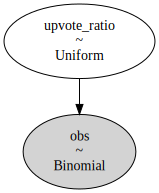

In [13]:
pm.model_to_graphviz(model)

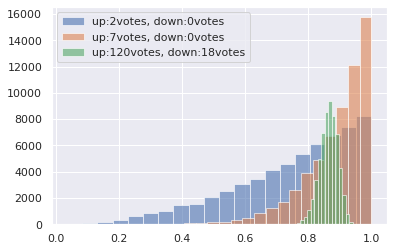

In [14]:
for idx,(upvote,downvote) in enumerate(votes):
    plt.hist(posteriors[idx],label=f"up:{upvote}votes, down:{downvote}votes",alpha=0.6,bins=20)
plt.legend()

## 演習問題

In [15]:
with pm.Model() as model:
    x=pm.Exponential("x",lam=4)

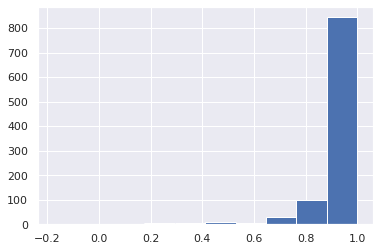

In [16]:
plt.hist(np.cos(x.random(size=1000)));

In [17]:
np.cos(x.random(size=1000)).mean()

0.9438979207144023

In [18]:
X=np.cos(x.random(size=1000))
X[X<1].mean()

0.9393789309531196